In [1]:
from typing import Final
import numpy as np
import torch
%matplotlib inline
import matplotlib.pyplot as plt
from diffusion_nocs.models import DiffusionInference, DinoFeatures, create_random_noises
from diffusion_nocs.resources import (
    DIFFUSION_NOCS_PT_PATH,
    DINO_PATCH_PCA_PATH,
    DINO_SMALL_MODEL_PATH,
    FONT_PATH,
    IMAGE_BASE_PATH,
)
from diffusion_nocs.utils import (
    build_diffusion_transform,
    load_np_rgb_image,
    tile_input_images,
    create_image_tensors,
    create_id_tensors,
    tile_output_images,
)
from diffusion_nocs.types import ALL_INPUT_TYPES

In [2]:
_DEVICE: Final = "cuda:0"

# NOTE: Please feel free to change the values below to see the performance changes.
_TIMESTEPS = 20
_CATEGORY_NAME = "camera"  # should be one of "bottle", bowl", "camera", "can", "laptop", "mug"

In [3]:
rgb_np = load_np_rgb_image(IMAGE_BASE_PATH / _CATEGORY_NAME / "rgb.png")
normal_np = load_np_rgb_image(IMAGE_BASE_PATH / _CATEGORY_NAME / "normal.png")

# NOTE: we assume the background of RGB image is white
mask_np = rgb_np.sum(-1) < (255 * 3)

In [4]:
dinov2 = DinoFeatures(DINO_SMALL_MODEL_PATH, DINO_PATCH_PCA_PATH)
dino_np = dinov2.get_pca_features(rgb_np, mask_np)

In [5]:
noises = create_random_noises(noise_num=1, device=_DEVICE)

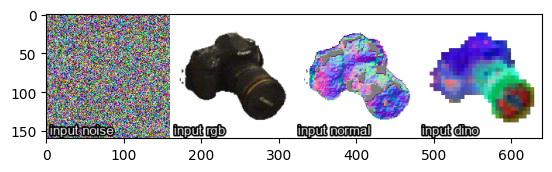

In [6]:
tile_input_image = tile_input_images(noises[0], rgb_np, normal_np, dino_np)
plt.imshow(np.array(tile_input_image))
plt.show()

In [8]:
image_tensors = create_image_tensors(noises, rgb_np, normal_np, dino_np, device=_DEVICE)
id_tensors = create_id_tensors(_CATEGORY_NAME, device=_DEVICE)

In [9]:
diffusion_nocs = DiffusionInference(DIFFUSION_NOCS_PT_PATH, timesteps=_TIMESTEPS)
nocs_tensors = diffusion_nocs.predict(image_tensors, id_tensors, noises)

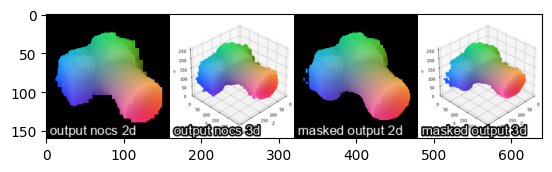

In [10]:
tile_output_image = tile_output_images(nocs_tensors[0], mask_np)
plt.imshow(np.array(tile_output_image))
plt.show()

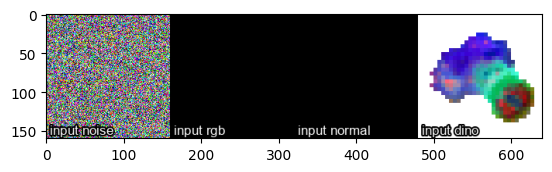

In [11]:
# NOTE: only dino is used as an input.
rgb_np = np.zeros_like(rgb_np)
normal_np = np.zeros_like(normal_np)

tile_input_image = tile_input_images(noises[0], rgb_np, normal_np, dino_np)
plt.imshow(np.array(tile_input_image))
plt.show()

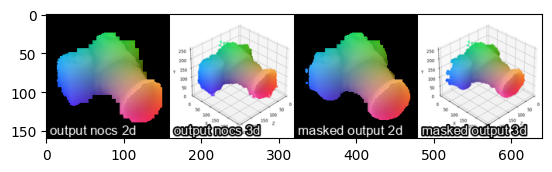

In [12]:
image_tensors = create_image_tensors(noises, rgb_np, normal_np, dino_np, device=_DEVICE)
nocs_tensors = diffusion_nocs.predict(image_tensors, id_tensors, noises)

tile_output_image = tile_output_images(nocs_tensors[0], mask_np)
plt.imshow(np.array(tile_output_image))
plt.show()

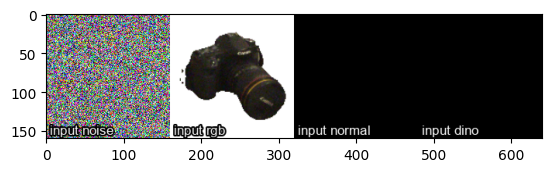

In [13]:
# NOTE: only rgb is used as an input.
rgb_np = load_np_rgb_image(IMAGE_BASE_PATH / _CATEGORY_NAME / "rgb.png")
normal_np = np.zeros_like(normal_np)
dino_np = np.zeros_like(dino_np)

tile_input_image = tile_input_images(noises[0], rgb_np, normal_np, dino_np)
plt.imshow(np.array(tile_input_image))
plt.show()

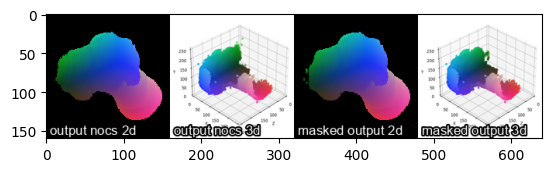

In [14]:
image_tensors = create_image_tensors(noises, rgb_np, normal_np, dino_np, device=_DEVICE)
nocs_tensors = diffusion_nocs.predict(image_tensors, id_tensors, noises)

tile_output_image = tile_output_images(nocs_tensors[0], mask_np)
plt.imshow(np.array(tile_output_image))
plt.show()